In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
police_data_df = pd.read_csv('C:/Users/DeAndre/Documents/GitHub/SFPD-Police-Data-Project/data/raw/Police_Department_Incident_Reports__2018_to_Present.csv')

# Basic Descriptive Statistics

In [5]:
police_data_df.shape

(421700, 27)

It appears our data has 27 columns and 421,700 rows (which matches up with what we know).

In [6]:
police_data_df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'shape', 'Neighborhoods'],
      dtype='object')

In [19]:
police_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421700 entries, 0 to 421699
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        421700 non-null  object 
 1   Incident Date            421696 non-null  object 
 2   Incident Time            421696 non-null  object 
 3   Incident Year            421696 non-null  float64
 4   Incident Day of Week     421696 non-null  object 
 5   Report Datetime          421696 non-null  object 
 6   Row ID                   421695 non-null  float64
 7   Incident ID              421695 non-null  float64
 8   Incident Number          421695 non-null  float64
 9   CAD Number               327836 non-null  float64
 10  Report Type Code         421695 non-null  object 
 11  Report Type Description  421695 non-null  object 
 12  Filed Online             86232 non-null   object 
 13  Incident Code            421695 non-null  float64
 14  Inci

In [7]:
police_data_df.nunique()

Incident Datetime          197820
Incident Date                1220
Incident Time                1440
Incident Year                   4
Incident Day of Week            7
Report Datetime            298991
Row ID                     421695
Incident ID                349811
Incident Number            305128
CAD Number                 240097
Report Type Code                4
Report Type Description         6
Filed Online                    1
Incident Code                 799
Incident Category              49
Incident Subcategory           71
Incident Description          796
Resolution                      4
Intersection                 6347
CNN                          6435
Police District                11
Analysis Neighborhood          41
Supervisor District            11
Latitude                     6435
Longitude                    6435
shape                        6435
Neighborhoods                 116
dtype: int64

In [20]:
police_data_df.isnull().sum()

Incident Datetime               0
Incident Date                   4
Incident Time                   4
Incident Year                   4
Incident Day of Week            4
Report Datetime                 4
Row ID                          5
Incident ID                     5
Incident Number                 5
CAD Number                  93864
Report Type Code                5
Report Type Description         5
Filed Online               335468
Incident Code                   5
Incident Category             316
Incident Subcategory          316
Incident Description            5
Resolution                      5
Intersection                21906
CNN                         21906
Police District                 5
Analysis Neighborhood       21985
Supervisor District         21906
Latitude                    21906
Longitude                   21906
shape                       21906
Neighborhoods               30552
dtype: int64

Observations: 'Incident Year' and 'Incident Day of Week' show the expected value ranges. Data has a significant number of rows with missing values. Largest being the columns where the incident location would be listed ('Intersection' , 'CNN' , 'Supervisor District', 'Latitude', 'Longitude', 'shape', 'Analysis Neighborhood', & 'Neighborhoods'). This may be due to the number of incident reports that were filed online, thus there would not be an officer on seen to list the location in the report.

In [ ]:
police_data_df["Incident Code"].unique()

In [ ]:
police_data_df["Report Type Code"].value_counts()

In [5]:
police_data_df['Resolution'].value_counts()

Open or Active          368571
Cite or Arrest Adult     98599
Unfounded                 2963
Exceptional Adult         1220
Name: Resolution, dtype: int64

In [ ]:
police_data_df['Incident Day of Week'].value_counts()

Data Visualizations

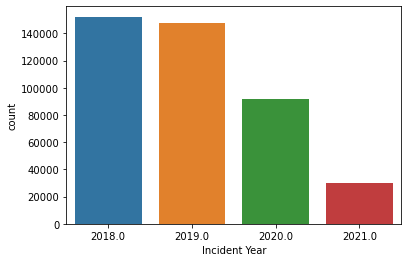

In [16]:
Incidents_by_Year = sns.countplot(x="Incident Year", data=police_data_df)

Here we see the number of incidents broken down by calendar year. The only interesting note is the sharp decrease in number of incidents in 2020, but there's a good reason for that anomaly.

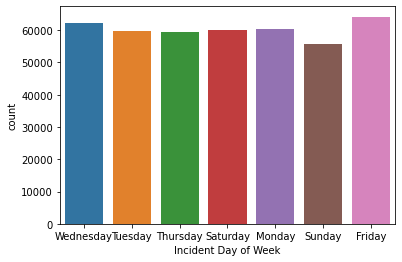

In [12]:
Incidents_by_Day_of_Week = sns.countplot(x="Incident Day of Week", data=police_data_df)

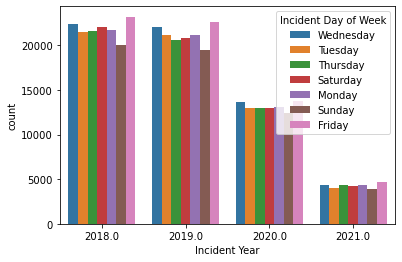

In [17]:
Incidents_by_Year_by_Day_of_Week = sns.countplot(x="Incident Year", hue = "Incident Day of Week", data=police_data_df)

Nothing to note here in incidents by day of the week, things appear very standard across the week.

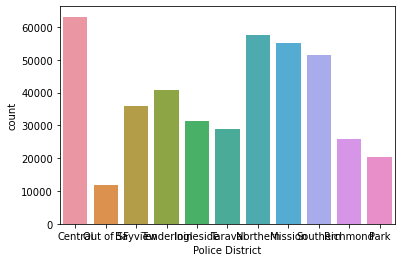

In [14]:
Incidents_by_District = sns.countplot(x="Police District", data=police_data_df)

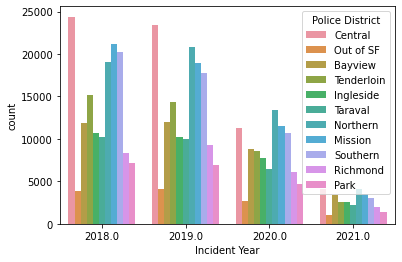

In [15]:
Incidents_by_Year = sns.countplot(x="Incident Year", hue = "Police District", data=police_data_df)

In [18]:
cols = [
    'Analysis Neighborhood',
    'Incident Code',
    'Incident Category',
    'Incident Subcategory',
    'Incident Description'
]

for col in cols:
    out = (
        police_data_df
        .groupby([col])
        .size()
        .reset_index(name='counts')
    )
    print(out.sort_values(by=['counts'], ascending=False).head(10))

             Analysis Neighborhood  counts
18                         Mission   44741
35                      Tenderloin   41374
5   Financial District/South Beach   34769
33                 South of Market   33451
0            Bayview Hunters Point   24663
40                Western Addition   13143
2              Castro/Upper Market   12377
22                     North Beach   12145
34                 Sunset/Parkside   11764
20                        Nob Hill   11681
     Incident Code  counts
225         6244.0   53411
780        71000.0   13774
659        28150.0   13323
251         6372.0   12824
120         4134.0   12421
274         7041.0   10725
740        64020.0   10326
267         7021.0   10267
253         6374.0   10119
215         6224.0    7570
      Incident Category  counts
18        Larceny Theft  129152
29  Other Miscellaneous   31292
21   Malicious Mischief   27095
26         Non-Criminal   26042
1               Assault   25222
2              Burglary   22506
24  Mo

Correlation Matrix of Incidents by Time